In [1]:
# This nb is to make Fig1c

In [1]:
import pandas as pd
import numpy as np
import json
from itertools import chain

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import glob

params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5],
    'savefig.facecolor':'white'
   }


mpl.rcParams.update(params)

timestr = time.strftime("%Y%m%d%H%M")

import random 
random.seed(12357)
np.random.seed(12357)

In [3]:
sol_saveat_dt = [1,1e-4][0]

print(sol_saveat_dt)

inpath = "output/"
outpath = "figures/fig1c/" 

1


In [4]:
##############################################
# set to True to save fig

savefigures = True #False #True 

##############################################

In [5]:
! ls -lh output | grep "_u\." | grep "sim_" | wc -l

190


In [6]:
print(len(glob.glob(inpath+"*_u.csv"))) 

190


In [7]:
input_file_ids = [i.rstrip("_u.csv") for i in glob.glob(inpath+"*_u.csv")]

In [8]:
selected_mets = [i[0:-1] for i in [ 

    'ATP_n0',
    'ATP_a0',
    'NADH_n0',
    'NADH_a0',
    
    'ATPmito_n0',
    'ATPmito_a0',
    'ATP_i_n0',
    'ATP_i_a0',
    
    'Glc_b0',
    'Glc_t_t0',
    'Glc_ecsBA0',
    'Glc_a0',
    
    'Glc_ecsAN0',
    'Glc_n0',
    'FBP_n0',
    'FBP_a0',
    
    'Lac_b0',
    'Lac_a0',
    'Lac_ecs0',
    'Lac_n0',

    'Pyr_n0',
    'Pyr_a0',
    'PYRmito_n0',
    'PYRmito_a0',

    'cAMP_a0',
    'GLY_a0',
    'f26bp_a0',
    'bHB_b0',
    
    'bHB_ecs0',
    'bHB_n0',
    'QH2mito_a0',
    'QH2mito_n0'

    
]]

len(selected_mets)

32

In [9]:
input_file_ids = sorted(input_file_ids)

In [10]:
input_dfs = []

for fid in input_file_ids:

    dfn = fid + "_u.csv"
    tfn = fid + "_t.csv"
    nfn = fid + "_unames.csv"
    
    df = pd.read_csv(dfn,header=None)
    tf = pd.read_csv(tfn,header=None)
    nf = pd.read_csv(nfn,header=None)
    
    df.columns = [i[:-1] for i in nf[0].values.tolist() ]
    
    df['time_s'] = tf[0].copy()
    df['condition'] = fid.replace("output/sim_","").split("_extraTag",1)[0]
    
    input_dfs.append(df)
    
input_df = pd.concat(input_dfs, axis=0, ignore_index=True)

In [11]:
input_df = input_df.reindex(sorted(input_df.columns), axis=1)

input_df.head(3)

,ADP_a,ADP_i_a,ADP_i_n,ADP_mi_a,ADP_mi_n,ADP_mx_a,ADP_mx_n,ADP_n,ADPmito_a,ADPmito_n,...,f26bp_a,h,hIP3Ca_a,mGluRboundRatio_a,n,nBK_a,pgate,sTRP_a,time_s,vV
0,0.045,0.044347,0.057207,0.043629,0.056055,1.144319,1.129008,0.047784,1.744560,1.851257,...,0.012170,0.981124,0.653157,0.0,0.034674,0.000007,0.035539,0.001247,1.0,0.0237
1,0.045,0.044306,0.057167,0.043589,0.056016,1.144333,1.128973,0.047784,1.744587,1.851184,...,0.012171,0.990555,0.653153,0.0,0.023402,0.000007,0.025259,0.001247,2.0,0.0237
2,0.045,0.044290,0.057161,0.043573,0.056010,1.144311,1.128928,0.047784,1.744545,1.851093,...,0.012172,0.990651,0.653133,0.0,0.023267,0.000007,0.025131,0.001247,3.0,0.0237


In [12]:
def_glut1_fig1 = [

    '121_default',
    'g1_61_def'
]

In [13]:
lut_cnds = {
    '121_default':"#069e1d", 
    'g1_61_def':"#fa6f0c"
}


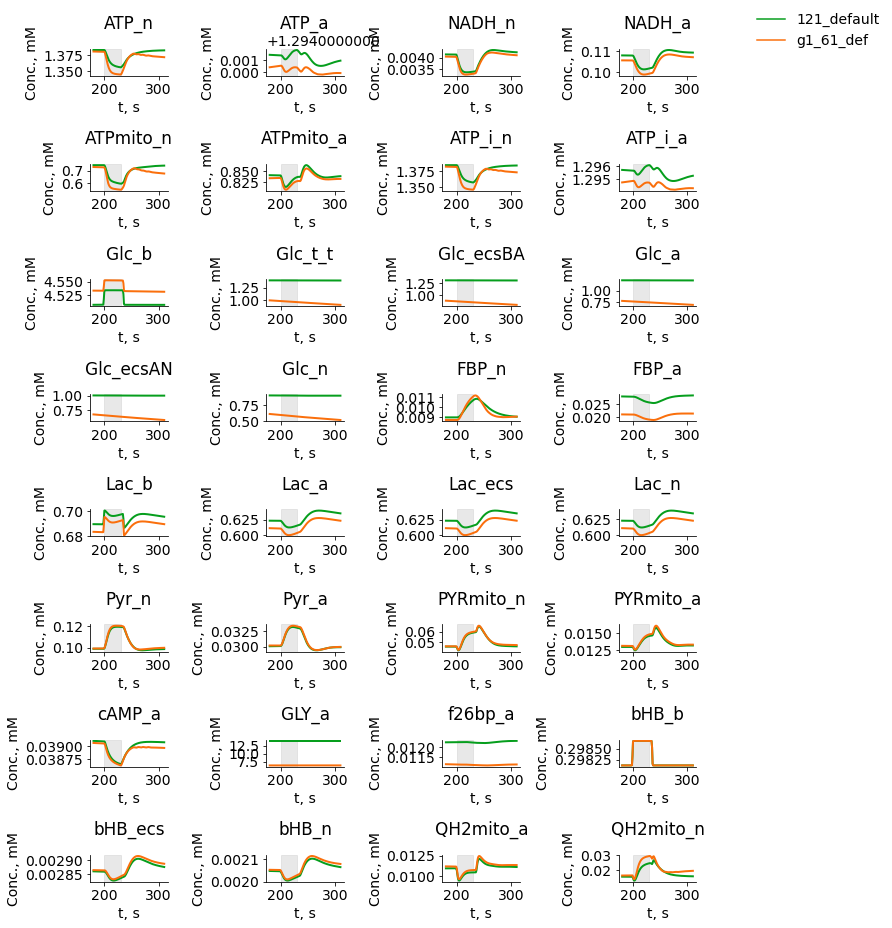

In [14]:
fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(10,13))  

for met, ax in zip(selected_mets, axs.ravel()):
        
    ax.axvspan(200, 230, color='lightgrey', alpha=0.5)

    g = sns.lineplot(data=input_df.loc[(input_df['time_s']>=180) & (input_df['condition'].isin(def_glut1_fig1)) ,:], 
                     x="time_s", y=met, 
                     palette=lut_cnds,hue='condition',
                     lw=2,ax=ax) 
    
    ax.legend([],[], frameon=False)
    
    ax.set_xlabel("t, s")
    ax.set_ylabel("Conc., mM")

    ax.set_title(met,pad=20)

    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)


plt.subplots_adjust(hspace=1)        
plt.subplots_adjust(wspace=0.35)        


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, [i for i in labels],bbox_to_anchor=(1.25, 1.0),frameon=False) # loc='upper center')

fig.tight_layout()
plt.show()    


if savefigures == True:
    
    spec_id = "fig1c_"
    
    fig.savefig(outpath +  spec_id +  timestr + ".pdf",transparent=True, bbox_inches="tight")
    fig.savefig(outpath +  spec_id +  timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")
